In [3]:
import pandas as pd
import numpy as np

df = sns.load_dataset("tips")
df

<IPython.core.display.Javascript object>

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [5]:
# Central tendency
print(df['tip'].mean())      # Mean
print(df['tip'].median())    # Median
print(df['tip'].mode())      # Mode

# Dispersion
print(df['tip'].std())       # Standard Deviation
print(df['tip'].var())       # Variance
print(df['tip'].min(), df['tip'].max())  # Range

# Summary
print(df.describe())

2.99827868852459
2.9
0    2.0
Name: tip, dtype: float64
1.3836381890011826
1.9144546380624725
1.0 10.0
       total_bill         tip        size
count  244.000000  244.000000  244.000000
mean    19.785943    2.998279    2.569672
std      8.902412    1.383638    0.951100
min      3.070000    1.000000    1.000000
25%     13.347500    2.000000    2.000000
50%     17.795000    2.900000    2.000000
75%     24.127500    3.562500    3.000000
max     50.810000   10.000000    6.000000


In [29]:
from statsmodels.stats.weightstats import ztest

# Example: Compare tip amount to a population mean of 3
z_stat, p_value = ztest(df['tip'], value=3)
print("Z-statistic:", z_stat)
print("p-value:", p_value)

Z-statistic: -0.01943264142291688
p-value: 0.984495971230584


In [31]:
from scipy.stats import ttest_1samp

t_stat, p = ttest_1samp(df['tip'], popmean=3)
print("T-statistic:", t_stat)
print("p-value:", p)


T-statistic: -0.019432641422916876
p-value: 0.9845119176410544


In [11]:
from scipy.stats import ttest_ind

group1 = df[df['sex'] == 'Male']['tip']
group2 = df[df['sex'] == 'Female']['tip']

t_stat, p = ttest_ind(group1, group2)
print("T-statistic:", t_stat)
print("p-value:", p)

T-statistic: 1.387859705421269
p-value: 0.16645623503456755


In [13]:
from scipy.stats import chi2_contingency

# Example: relationship between sex and smoker status
contingency_table = pd.crosstab(df['sex'], df['smoker'])
chi2, p, dof, expected = chi2_contingency(contingency_table)

print("Chi2 Stat:", chi2)
print("p-value:", p)

Chi2 Stat: 0.0
p-value: 1.0


In [15]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

X = df[['total_bill', 'size']]
X = add_constant(X)

# Calculate VIF
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif_data)

      feature       VIF
0       const  8.904095
1  total_bill  1.557586
2        size  1.557586


In [17]:
from scipy.stats import shapiro

stat, p = shapiro(df['tip'])
print("Shapiro-Wilk Stat:", stat)
print("p-value:", p)


Shapiro-Wilk Stat: 0.8978110496018736
p-value: 8.200360128656659e-12


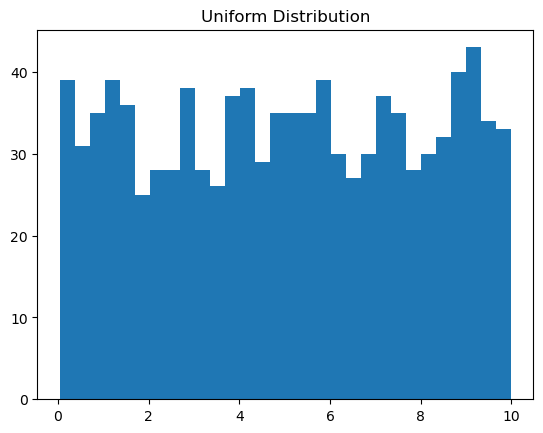

In [19]:
import numpy as np
import matplotlib.pyplot as plt

data = np.random.uniform(0, 10, 1000)
plt.hist(data, bins=30)
plt.title("Uniform Distribution")
plt.show()


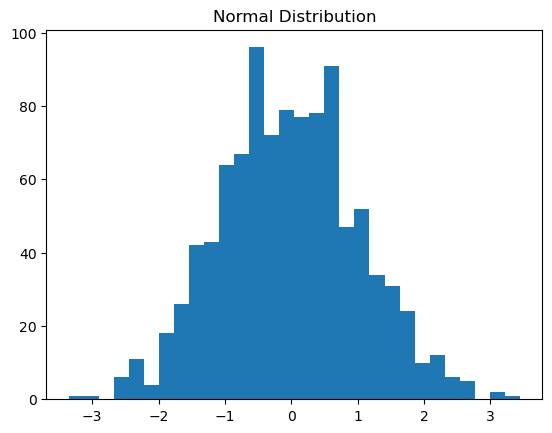

In [21]:
data = np.random.normal(loc=0, scale=1, size=1000)
plt.hist(data, bins=30)
plt.title("Normal Distribution")
plt.show()


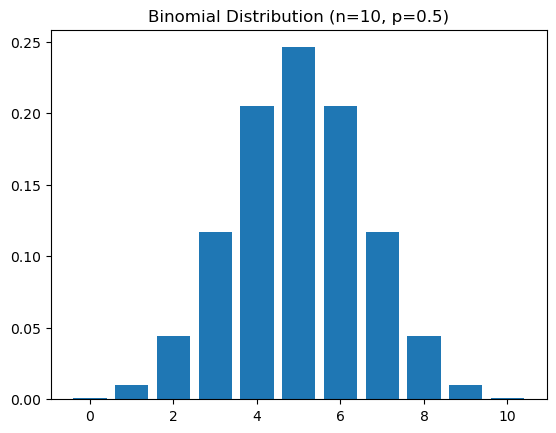

In [23]:
from scipy.stats import binom

n, p = 10, 0.5
x = np.arange(0, n+1)
prob = binom.pmf(x, n, p)

plt.bar(x, prob)
plt.title("Binomial Distribution (n=10, p=0.5)")
plt.show()


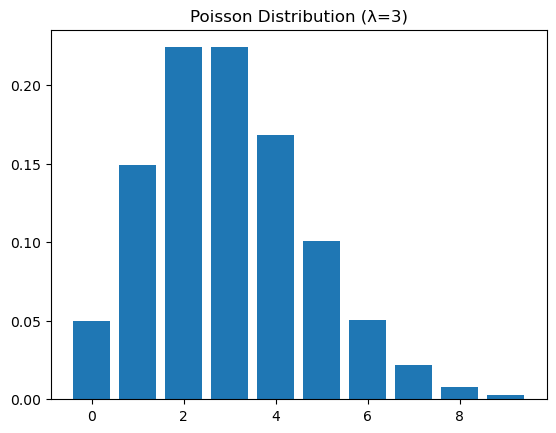

In [25]:
from scipy.stats import poisson

mu = 3
x = np.arange(0, 10)
prob = poisson.pmf(x, mu)

plt.bar(x, prob)
plt.title("Poisson Distribution (λ=3)")
plt.show()


In [27]:
group_A = df[df['day'] == 'Sun']['tip']
group_B = df[df['day'] == 'Sat']['tip']

t_stat, p = ttest_ind(group_A, group_B)
print("T-statistic:", t_stat)
print("p-value:", p)

# Interpretation:
if p < 0.05:
    print("Significant difference between groups.")
else:
    print("No significant difference.")


T-statistic: 1.1431231469058436
p-value: 0.2546844163253124
No significant difference.
